In [2]:
#!pip install --upgrade tensorflow

In [20]:
from typing import List, NamedTuple, Dict, Callable
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

${\displaystyle {\mathcal {U}}_{[a,b]}} = 0, 1$

In [21]:
normal = tfd.Uniform(low=0, high=1)
samples = normal.sample(100).numpy()

2021-12-21 20:17:47.798227: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

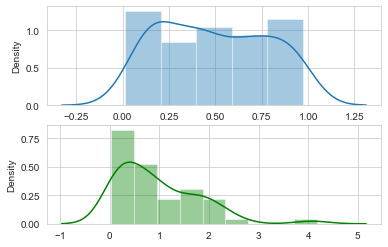

In [22]:
fig, axes = plt.subplots(2)
sns.distplot(samples, ax=axes[0])
sns.distplot(-np.log(samples), ax=axes[1], color="green")

$H(X) = log_b P(x_i)$

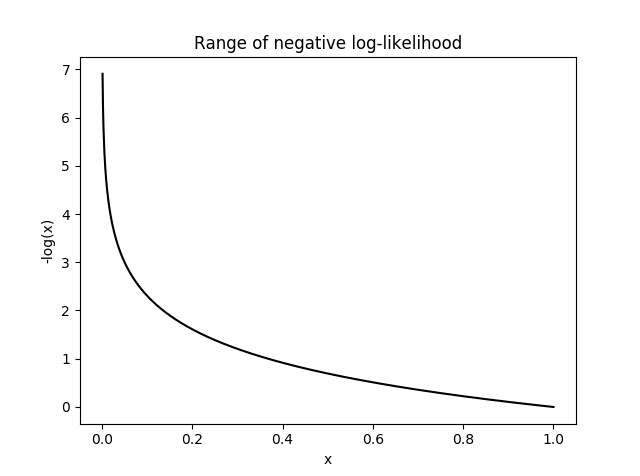

In [27]:
def shannon_entropy(sample: List) -> float:
    return np.nansum(sample * -np.log(sample))

shannon_entropy(samples)

25.75041

Cross entropy \
$\mathcal{H}(p, q) = - \sum_{k=1}^K p_k log q_k$

In [28]:
p = normal.sample(100)
q = normal.sample(100)

In [29]:
def cross_entropy(p: np.array, q: np.array) -> float:
    return - np.nansum(p * np.log(q))

cross_entropy(p, q)

46.034153

In [142]:
import numpy as np
import pandas as pd
#from scipy.stats import binom

binom1 = np.random.binomial(1, 0.3, 10)
binom2 = np.random.binomial(1, 0.3, 10)
#binom1 = binom.pmf(1, 10, 0.3)
#binom2 = binom.pmf(1, 10, 0.3, loc=0)
pmf1 = np.sum(binom1)/len(binom1)
pmf2 = binom2/len(binom2)

valuesA, countsA = np.unique(binom1, return_counts=True)
valuesB, countsB = np.unique(binom2, return_counts=True)
pmf1 = pd.DataFrame([countsA/sum(countsA)], columns = valuesA).values[0]
pmf2 = pd.DataFrame([countsB/sum(countsB)], columns = valuesB).values[0]

df = pd.DataFrame({"pmf1": pmf1, "pmf2": pmf2})

In [126]:
def joint_probability(A, B):
    df = pd.DataFrame({"x": A, "y": B})
    print(df)
    prod= {}
    for row in df.iterrows():
        if (row[1][0] == 0) & (row[1][1] == 0):
            if "00" in prod:
                prod["00"] += 1 
            else:
                prod["00"] = 1 
        elif (row[1][0] == 1) & (row[1][1] == 0):
            if "10" in prod:
                prod["10"] += 1 
            else:
                prod["10"] = 1 
        elif (row[1][0] == 0) & (row[1][1] == 1):
            if "01" in prod:
                prod["01"] += 1 
            else:
                prod["01"] = 1 
        elif (row[1][0] == 1) & (row[1][1] == 1):
            if "11" in prod:
                prod["11"] += 1 
            else:
                prod["11"] = 1 
        else: 
            pass
    joint_prob =[value/10 for value in prod.values()]
    return joint_prob

In [186]:
def joint_probability(A, B) -> np.matrix:
    return np.outer(A, B)

In [187]:
joint_probability(df.pmf1, df.pmf2)

array([[0.56, 0.14],
       [0.24, 0.06]])

Joint entropy \
$\mathcal{H}(X, Y) = - \sum_{x, y}p(x, y) log_2 p(x, y)$

In [188]:
def joint_entropy(A, B) -> float:
    joint_prob = joint_probability(A, B)
    return - np.sum(joint_prob * np.log2(joint_prob))

je = joint_entropy(df.pmf1, df.pmf2)

In [194]:
np.sum(joint_probability(df.pmf1, df.pmf2) * np.log2(joint_probability(df.pmf1, df.pmf2)))

-1.603218994118055

Conditional Entropy

$H(B|A = a) = $
$H(A, B) - H(B)$

In [158]:
def conditional_entropy(A, B) -> float:
    return joint_entropy(A, B) - shannon_entropy(B)

conditional_entropy(df.pmf1, df.pmf2)

1.1028165705798672

Mutual Information

$I(A;B) = H(B) - \sum_{a}p(A = a)H(B|A = a)$

In [181]:
shannon_entropy(pmf2)
#conditional_entropy(df.pmf1, df.pmf2)

0.5004024235381879

In [170]:
def mutual_information(A: List, B: List) -> float:
    return shannon_entropy(B) - np.nansum(A * conditional_entropy(A, B))

mutual_information(df.pmf1, df.pmf2)

-0.6024141470416793

KL Divergence

$D_KL(P||Q) = H_{cross}(P, Q) - H(P)$

In [22]:
tfd.Poisson(2).sample(1000)

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([3., 2., 1., 2., 4., 0., 1., 2., 2., 1., 0., 5., 1., 2., 0., 1., 1.,
       0., 2., 1., 0., 3., 5., 1., 1., 0., 2., 2., 2., 3., 2., 0., 2., 3.,
       1., 0., 1., 4., 1., 2., 3., 2., 3., 2., 3., 0., 2., 2., 0., 2., 2.,
       1., 2., 1., 1., 1., 4., 4., 2., 4., 2., 5., 5., 5., 1., 1., 1., 4.,
       2., 3., 4., 1., 4., 5., 4., 1., 2., 3., 2., 2., 2., 0., 3., 2., 1.,
       2., 3., 1., 1., 1., 1., 0., 2., 4., 2., 4., 3., 1., 1., 0., 2., 3.,
       2., 4., 0., 4., 1., 1., 2., 2., 0., 1., 2., 0., 2., 3., 4., 0., 0.,
       4., 4., 2., 2., 1., 1., 1., 3., 3., 2., 1., 0., 2., 0., 2., 4., 3.,
       5., 0., 0., 2., 2., 2., 3., 4., 3., 1., 0., 0., 4., 2., 2., 1., 5.,
       1., 1., 2., 5., 2., 4., 2., 2., 0., 2., 1., 1., 0., 1., 1., 2., 1.,
       0., 3., 3., 1., 2., 4., 1., 1., 3., 3., 2., 1., 1., 3., 3., 2., 3.,
       1., 4., 2., 1., 3., 3., 1., 0., 3., 2., 2., 2., 0., 4., 2., 2., 1.,
       1., 3., 1., 5., 1., 3., 1., 1., 1., 1., 3., 

In [134]:
A = tfd.Poisson(2) # lambda = 2
sampleA =  A.sample(1000)
B = tfd.Poisson(5) # lambda = 5
sampleB = B.sample(1000)

In [135]:
pdfA = np.unique(A.prob(sampleA))
pdfB = np.unique(B.prob(sampleB))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

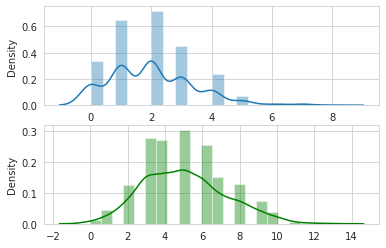

In [137]:
fig, axes = plt.subplots(2)
sns.distplot(sampleA, ax=axes[0])
sns.distplot(sampleB, ax=axes[1], color="green")

In [113]:
def kl_divergence(shannon_entropy: Callable, cross_entropy: Callable) -> float:
    return -shannon_entropy + cross_entropy

kl_divergence(shannon_entropy(pdfA), cross_entropy(pdfA, pdfB))

Gini impurity

tells us what is the probability of misclassifying an observation.

${\displaystyle \operatorname {I} _{G}(p)=\sum _{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-p_{i}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}p_{i}^{2}=1-\sum _{i=1}^{J}p_{i}^{2}}$

$p_1(1-p_1) + p_2 (1 - p_2)$

In [195]:
#TODO: Prove why A|B if A is fully determined by A, then 0